In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
cf.go_offline
import warnings
warnings.simplefilter("ignore")
!pip install dtale
import dtale as dt


In [2]:
df=pd.read_csv("crimes_against_women_2001-2014.csv")

In [3]:
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


### Removing duplicate column

In [4]:
df=df.drop(["Unnamed: 0"],axis=1)

In [5]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


### Cleaning State/UT Column

In [6]:
df["STATE/UT"]=df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)
df['STATE/UT'].replace("delhiut",'delhi',inplace=True)

In [7]:
len(df["STATE/UT"].unique())

36

In [8]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhrapradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhrapradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhrapradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,andhrapradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,andhrapradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,puducherry,Puducherry,2014,7,6,1,20,7,3,0


### Checking for null

In [174]:
ddf.isnull()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10672,False,False,False,False,False,False,False,False,False,False
10673,False,False,False,False,False,False,False,False,False,False
10674,False,False,False,False,False,False,False,False,False,False
10675,False,False,False,False,False,False,False,False,False,False


### State with High number of Rape

In [12]:
df.groupby(["STATE/UT"])["Rape"].sum().sort_values(ascending=False).head(5)

STATE/UT
madhyapradesh    90996
uttarpradesh     51150
maharashtra      48974
westbengal       47876
rajasthan        45684
Name: Rape, dtype: int64

### State with High number of Kidnapping and Abduction

In [14]:
df.groupby(["STATE/UT"])["Kidnapping and Abduction"].sum().sort_values(ascending=False).head(5)

STATE/UT
uttarpradesh    135906
rajasthan        66278
assam            62074
westbengal       61158
bihar            57086
Name: Kidnapping and Abduction, dtype: int64

### State with High number of Dowry Deaths

In [16]:
df.groupby(["STATE/UT"])["Dowry Deaths"].sum().sort_values(ascending=False).head(5)

STATE/UT
uttarpradesh     57256
bihar            32206
madhyapradesh    21090
andhrapradesh    13844
westbengal       12308
Name: Dowry Deaths, dtype: int64

### State with High number of Assault on women with intent to outrage her modesty

In [17]:
df.groupby(["STATE/UT"])["Assault on women with intent to outrage her modesty"].sum().sort_values(ascending=False).head(5)

STATE/UT
madhyapradesh    195478
andhrapradesh    126952
maharashtra      114704
uttarpradesh      91212
rajasthan         83362
Name: Assault on women with intent to outrage her modesty, dtype: int64

### State with High number of Insult to modesty of Women

In [18]:
df.groupby(["STATE/UT"])["Insult to modesty of Women"].sum().sort_values(ascending=False).head(5)

STATE/UT
andhrapradesh    86964
uttarpradesh     53130
maharashtra      32634
tamilnadu        21170
madhyapradesh    20964
Name: Insult to modesty of Women, dtype: int64

### State with High number of Cruelty by Husband or his Relatives

In [19]:
df.groupby(["STATE/UT"])["Cruelty by Husband or his Relatives"].sum().sort_values(ascending=False).head(5)

STATE/UT
westbengal       344124
andhrapradesh    280906
rajasthan        262200
uttarpradesh     193738
maharashtra      193202
Name: Cruelty by Husband or his Relatives, dtype: int64

### State with High number of Importation of Girls


In [20]:
df.groupby(["STATE/UT"])["Importation of Girls"].sum().sort_values(ascending=False).head(5)

STATE/UT
bihar            904
jharkhand        298
westbengal       254
madhyapradesh    134
karnataka         94
Name: Importation of Girls, dtype: int64

In [181]:
df_year=df.groupby(["Year"])["Rape","Kidnapping and Abduction","Dowry Deaths","Assault on women with intent to outrage her modesty","Insult to modesty of Women","Cruelty by Husband or his Relatives","Importation of Girls"].sum()

In [184]:
df_year

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


In [29]:
df.corr()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,1.000000,0.052522,0.095102,0.007497,0.050482,-0.009024,0.059667,-0.028462
Rape,0.052522,1.000000,0.765154,0.707507,0.909887,0.477796,0.768774,0.223290
Kidnapping and Abduction,0.095102,0.765154,1.000000,0.791341,0.666376,0.368008,0.746002,0.130405
Dowry Deaths,0.007497,0.707507,0.791341,1.000000,0.612800,0.517791,0.594255,0.283636
Assault on women with intent to outrage her modesty,0.050482,0.909887,0.666376,0.612800,1.000000,0.590319,0.744117,0.115706
Insult to modesty of Women,-0.009024,0.477796,0.368008,0.517791,0.590319,1.000000,0.553575,0.031304
Cruelty by Husband or his Relatives,0.059667,0.768774,0.746002,0.594255,0.744117,0.553575,1.000000,0.132135
Importation of Girls,-0.028462,0.223290,0.130405,0.283636,0.115706,0.031304,0.132135,1.000000


In [30]:
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

<AxesSubplot: xlabel='Year'>

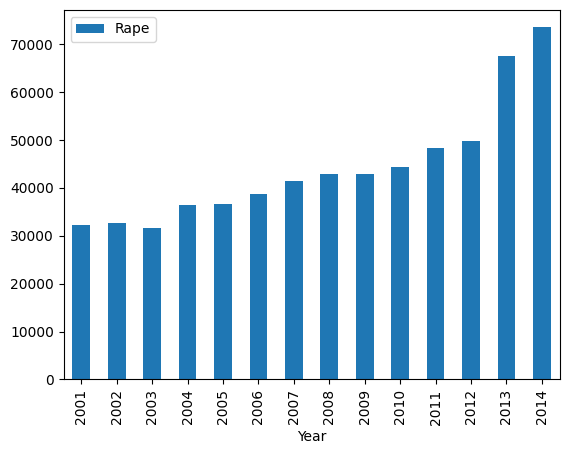

In [32]:
df_year.plot(x='Year',y='Rape',kind="bar")

In [33]:
df_year

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,2001,32150,29290,13702,68248,19492,98340,228
1,2002,32746,29012,13644,67886,20310,98474,152
2,2003,31694,26592,12416,65878,24650,101406,92
3,2004,36466,31156,14052,69134,20002,116242,178
4,2005,36718,31500,13574,68350,19968,116638,298
5,2006,38696,34828,15236,73234,19932,126256,134
6,2007,41474,40832,16186,77468,21900,151860,122
7,2008,42934,45878,16344,80826,24428,162688,134
8,2009,42794,51482,16766,77422,22018,179092,96
9,2010,44344,59590,16782,81226,19922,188082,72


In [34]:
df_year["total crime"]=df_year["Rape"]+df_year["Kidnapping and Abduction"]+df_year["Dowry Deaths"]+df_year["Assault on women with intent to outrage her modesty"]+df_year["Insult to modesty of Women"]+df_year["Cruelty by Husband or his Relatives"]+df_year["Importation of Girls"]

In [35]:
df_year

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total crime
0,2001,32150,29290,13702,68248,19492,98340,228,261450
1,2002,32746,29012,13644,67886,20310,98474,152,262224
2,2003,31694,26592,12416,65878,24650,101406,92,262728
3,2004,36466,31156,14052,69134,20002,116242,178,287230
4,2005,36718,31500,13574,68350,19968,116638,298,287046
5,2006,38696,34828,15236,73234,19932,126256,134,308316
6,2007,41474,40832,16186,77468,21900,151860,122,349842
7,2008,42934,45878,16344,80826,24428,162688,134,373232
8,2009,42794,51482,16766,77422,22018,179092,96,389670
9,2010,44344,59590,16782,81226,19922,188082,72,410018


In [36]:
df_total_crime=df_year[["Year","total crime"]]

In [37]:
df_total_crime

,Year,total crime
0,2001,261450
1,2002,262224
2,2003,262728
3,2004,287230
4,2005,287046
5,2006,308316
6,2007,349842
7,2008,373232
8,2009,389670
9,2010,410018


### Bargraph to show year vs total crime

<AxesSubplot: xlabel='Year', ylabel='total crime'>

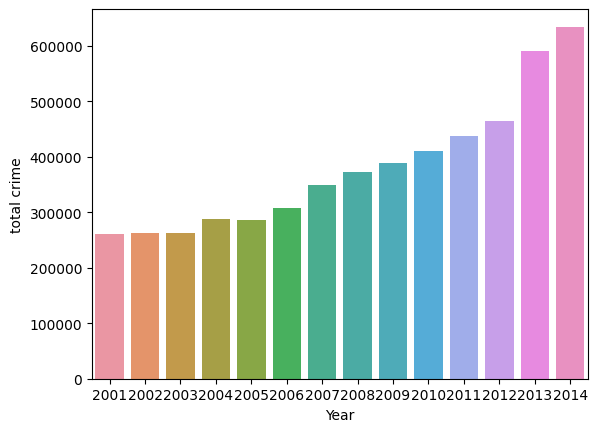

In [38]:
ax=sns.barplot(x="Year",y='total crime', data=df_total_crime)
ax

### Crime rates in karnataka

In [41]:
df_karnataka=df.loc[df["STATE/UT"]=='karnataka']

In [42]:
df_karnataka

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
254,karnataka,BAGALKOT,2001,2,7,1,39,0,50,0
255,karnataka,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
256,karnataka,BANGALORE RURAL,2001,13,10,30,90,0,123,0
257,karnataka,BELGAUM,2001,8,12,4,62,0,125,0
258,karnataka,BELLARY,2001,16,11,5,82,0,49,0
...,...,...,...,...,...,...,...,...,...,...
10162,karnataka,Udupi,2014,28,2,3,111,1,57,0
10163,karnataka,Uttara Kannada,2014,25,22,0,154,6,56,0
10164,karnataka,Yadgiri,2014,41,21,2,148,0,48,0
10165,karnataka,Belagavi City,2014,22,16,8,85,3,72,0


In [43]:
df_karnataka.drop(df_karnataka[['DISTRICT']],inplace=True,axis=1)

In [44]:
df_karnataka

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
254,karnataka,2001,2,7,1,39,0,50,0
255,karnataka,2001,40,56,40,223,51,229,0
256,karnataka,2001,13,10,30,90,0,123,0
257,karnataka,2001,8,12,4,62,0,125,0
258,karnataka,2001,16,11,5,82,0,49,0
...,...,...,...,...,...,...,...,...,...
10162,karnataka,2014,28,2,3,111,1,57,0
10163,karnataka,2014,25,22,0,154,6,56,0
10164,karnataka,2014,41,21,2,148,0,48,0
10165,karnataka,2014,22,16,8,85,3,72,0


In [50]:
df_karnataka_year=df_karnataka.groupby(["Year"])["Rape",'Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls'].sum()

In [51]:
df_karnataka_year

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,586,542,440,3330,162,3510,0
2002,584,600,466,3296,200,3652,0
2003,642,488,388,3170,168,3408,0
2004,582,572,518,2870,114,3176,0
2005,686,624,522,3170,142,3766,0
2006,800,656,488,3366,76,4258,0
2007,872,780,502,3656,56,5014,0
2008,892,810,518,3908,88,5276,2
2009,1018,816,528,4372,128,6370,4


<AxesSubplot: ylabel='Kidnapping and Abduction'>

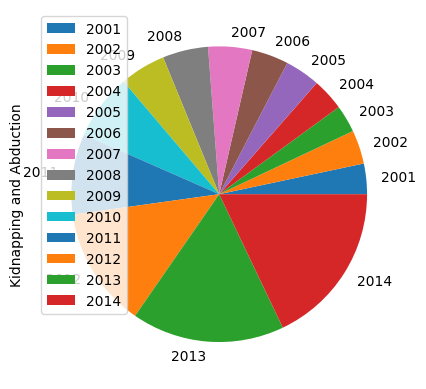

In [52]:
df_karnataka_year.plot(kind='pie',y='Kidnapping and Abduction')

<AxesSubplot: ylabel='Rape'>

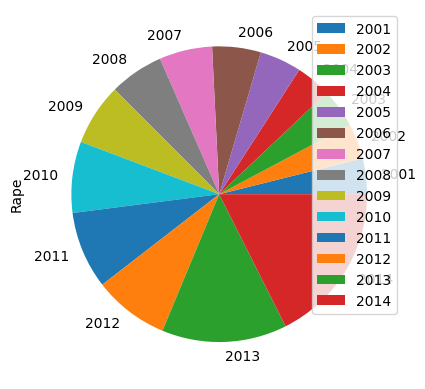

In [53]:
df_karnataka_year.plot(kind='pie',y='Rape')

In [54]:
df_year

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total crime
0,2001,32150,29290,13702,68248,19492,98340,228,261450
1,2002,32746,29012,13644,67886,20310,98474,152,262224
2,2003,31694,26592,12416,65878,24650,101406,92,262728
3,2004,36466,31156,14052,69134,20002,116242,178,287230
4,2005,36718,31500,13574,68350,19968,116638,298,287046
5,2006,38696,34828,15236,73234,19932,126256,134,308316
6,2007,41474,40832,16186,77468,21900,151860,122,349842
7,2008,42934,45878,16344,80826,24428,162688,134,373232
8,2009,42794,51482,16766,77422,22018,179092,96,389670
9,2010,44344,59590,16782,81226,19922,188082,72,410018


In [58]:
data_2001=pd.DataFrame(df_year.iloc[0]).T

In [59]:
data_2001.reset_index(drop=True,inplace=True)

In [60]:
data_2001

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total crime
0,2001,32150,29290,13702,68248,19492,98340,228,261450


In [61]:
data_2001 = data_2001.set_index('Year')

In [72]:
data_2001

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total crime
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450


In [82]:
data_2014=pd.DataFrame(df_year.iloc[13]).T

In [83]:
data_2014

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total crime
13,2014,73470,114622,16910,164470,19470,245754,26,634722


In [152]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']


In [153]:
df_top_crimes=pd.DataFrame(columns=['crimes',"total"])

In [154]:
df_top_crimes

,crimes,total


In [155]:
for i in crimes:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df_year[i].sum(axis=0)},ignore_index=True)

In [156]:
df_top_crimes

,crimes,total
0,Rape,619158
1,Kidnapping and Abduction,746198
2,Dowry Deaths,215480
3,Assault on women with intent to outrage her mo...,1212258
4,Insult to modesty of Women,292756
5,Cruelty by Husband or his Relatives,2233888
6,Importation of Girls,1872


In [163]:
df_top_crimes=df_top_crimes.sort_values(by='total',ascending=False)

In [164]:
df_top_crimes

,crimes,total
5,Cruelty by Husband or his Relatives,2233888
3,Assault on women with intent to outrage her mo...,1212258
1,Kidnapping and Abduction,746198
0,Rape,619158
4,Insult to modesty of Women,292756
2,Dowry Deaths,215480
6,Importation of Girls,1872


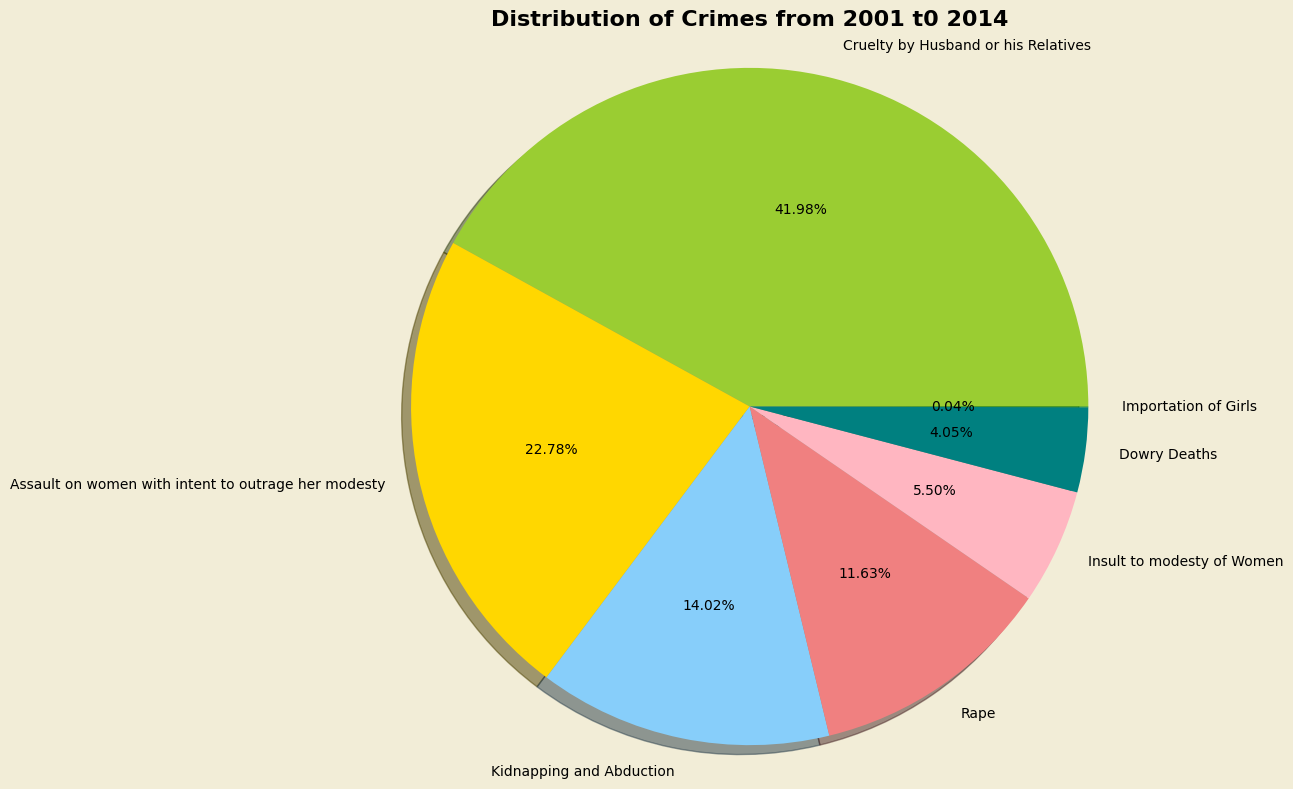

In [167]:
list_crimes_number=list(df_top_crimes['total'])
list_crimes=list(df_top_crimes['crimes'])
fig=plt.figure(figsize=(12,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','lightpink','teal','green']
#patches,text=plt.pie(list_crimes_number,colors=colors,labels=list_crimes_number,autopct='%1.1f%%')
plt.pie(list_crimes_number,colors=colors,labels=list_crimes,autopct='%1.2f%%',shadow=True)
#plt.legend()
plt.title("Distribution of Crimes from 2001 t0 2014",fontweight='bold',fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Thank you